# SVMs (Support Vector Machines)

Support Vector Machines (SVMs) are supervised learning models utilized for both classification and regression analysis. They are particularly well-suited for binary classification tasks, and their underlying principle can be extended to multiclass classification and regression as well.

Here are some key points about SVMs:

## 1. Classification and Regression Analysis:
   - **Classification**: SVMs work by finding a decision boundary (a hyperplane in a multi-dimensional space) that best separates the classes in the feature space.
   - **Regression**: In the case of regression, SVMs try to find a hyperplane that fits the data points as closely as possible, within a certain margin.

## 2. Scalability:
   - SVMs don't scale very well with the number of observations (large datasets). The time complexity of standard implementations is roughly O(n^2) to O(n^3), where n is the number of observations.

## 3. Large Margin Classification:
   - One of the key features of SVMs is their ability to find a decision boundary that maximizes the margin between classes. This is often referred to as "large margin classification".
   - The larger margin contributes to better generalization, meaning the model performs better on unseen data.

## 4. Kernel Trick:
   - SVMs have a neat trick called the kernel trick which allows them to build a decision boundary in a high-dimensional space without computing the coordinates of the data in that space, but rather by simply computing the inner products between the images of all pairs of data in the feature space.
   
## 5. Hyperparameters:
   - Key hyperparameters in SVMs include the regularization parameter (C), the choice of kernel (linear, polynomial, radial basis function, etc.), and the specific parameters of the kernel.

## 6. Advantages and Disadvantages:
   - **Advantages**: 
       - Effective in high dimensional spaces.
       - Works well with a clear margin of separation.
       - Robust to outliers.
   - **Disadvantages**:
       - Poor performance on highly skewed/imbalanced data sets.
       - Doesn't directly provide probability estimates.

## 7. Applications:
   - SVMs are used in a variety of applications including but not limited to:
       - Text classification
       - Image recognition
       - Bioinformatics (e.g., cancer classification)
       - Handwritten digit recognition

These characteristics make SVMs a powerful tool for many machine learning tasks, although the scalability issue requires consideration especially for larger datasets.

Use the `C` parameter to adjust the training, if it's too low the model will be underfitted

In [1]:

from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2) # Iris-Virginica
svm_clf = make_pipeline(
    StandardScaler(),
    LinearSVC(C=1, random_state=42),
    )
svm_clf.fit(X, y)

X_new = [[5.5, 1.7],[5.0, 1.5]]
svm_clf.predict(X_new)
# The linear SVM classifier predicts that the first flower is an Iris-Virginica while the second is not.

/Users/fifi/Library/Caches/pypoetry/virtualenvs/ml-book-oreilly-scikit-keras-tf-wYfakSSe-py3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


array([ True, False])

In [2]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

In [3]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, random_state=42)
    )

polynomial_svm_clf.fit(X, y)

/Users/fifi/Library/Caches/pypoetry/virtualenvs/ml-book-oreilly-scikit-keras-tf-wYfakSSe-py3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=10, random_state=42))])

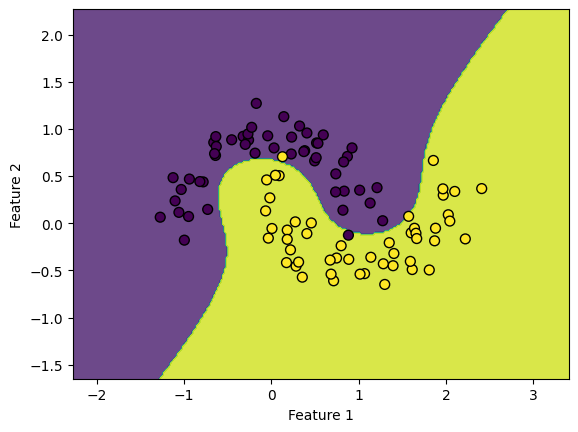

In [8]:
# Polynomial Kernel
# Kernel trick makes it possible to get the same result as if you added many polynomial features, 
# even with very high-degree polynomials, without actually having to add them. 
# So there is no combinatorial explosion of the number of features since you don’t actually add any features. This trick is implemented by the SVC class. Let’s test it on the moons dataset:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
poly_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=3, coef0=1, C=5)
    )

poly_kernel_svm_clf.fit(X, y)
def plot_decision_boundary(clf, X, y):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, linewidth=1)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(poly_kernel_svm_clf, X, y)


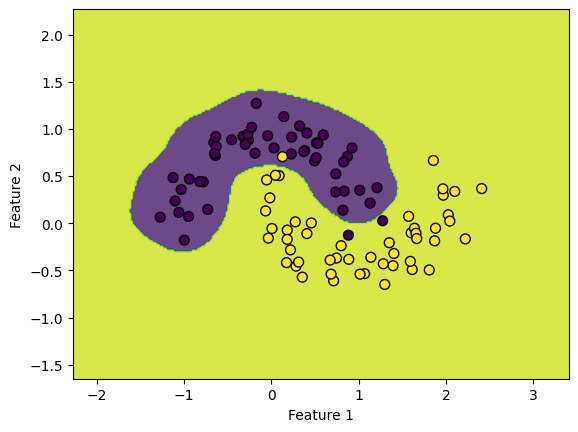

In [9]:
# Gaussian RBF Kernel
# Used for non-linearly separable data

rbf_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf", gamma=5, C=0.001)
    )
rbf_kernel_svm_clf.fit(X, y)

plot_decision_boundary(rbf_kernel_svm_clf, X, y)

# SVM Regression
SVM algorithm is quite versatile: not only does it support linear and nonlinear classification,
but it also supports linear and nonlinear regression. The trick is to reverse the objective:

Instead of trying to fit the largest possible street between two classes while limiting margin violations,
SVM Regression tries to fit as many instances as possible on the street while limiting margin violations


![Alt text](image-2.png)


## For linear
![Alt](image-3.png)

## Non linear
![Alt text](image-4.png)

In [ ]:
# And then a lot of math, i'll come back here once i'm smarter